### Import Fonctions

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
from folium.plugins import HeatMap
import statsmodels.formula.api as smf
from sklearn.utils import shuffle

### Import dataset

In [2]:
airbnb=pd.read_csv('AB_NYC_2019.csv')

In [3]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
airbnb.shape

(48895, 16)

In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

# Wrangling Data

### Removing not usefull columns

In [6]:
airbnb=airbnb.drop(['id','name','host_id','host_name','neighbourhood','reviews_per_month'],axis=1)

### Transform room_type column

In [7]:
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [8]:
room_type=pd.get_dummies(airbnb.room_type)
room_type.head()

,Entire home/apt,Private room,Shared room
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


### Transform neighbourhood_group

In [9]:
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [10]:
neighborhood_group=pd.get_dummies(airbnb.neighbourhood_group)
neighborhood_group.head()

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0


### Adding new columns

In [11]:
airbnb=airbnb.drop(['room_type','neighbourhood_group'],axis=1)

In [12]:
airbnb=pd.concat([airbnb,room_type,neighborhood_group],axis='columns')
airbnb.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,40.64749,-73.97237,149,1,9,2018-10-19,6,365,0,1,0,0,1,0,0,0
1,40.75362,-73.98377,225,1,45,2019-05-21,2,355,1,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,NaN,1,365,0,1,0,0,0,1,0,0
3,40.68514,-73.95976,89,1,270,2019-07-05,1,194,1,0,0,0,1,0,0,0
4,40.79851,-73.94399,80,10,9,2018-11-19,1,0,1,0,0,0,0,1,0,0


### Transforming last_review column into number of days since the last review

In [13]:
airbnb=airbnb.dropna(axis=0,subset=['last_review'])

In [14]:
airbnb['last_review']=pd.to_datetime(airbnb['last_review'])
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 0 to 48852
Data columns (total 16 columns):
latitude                          38843 non-null float64
longitude                         38843 non-null float64
price                             38843 non-null int64
minimum_nights                    38843 non-null int64
number_of_reviews                 38843 non-null int64
last_review                       38843 non-null datetime64[ns]
calculated_host_listings_count    38843 non-null int64
availability_365                  38843 non-null int64
Entire home/apt                   38843 non-null uint8
Private room                      38843 non-null uint8
Shared room                       38843 non-null uint8
Bronx                             38843 non-null uint8
Brooklyn                          38843 non-null uint8
Manhattan                         38843 non-null uint8
Queens                            38843 non-null uint8
Staten Island                     38843 non-null uint

In [15]:
# Searching the most recent review date
last_review=airbnb.last_review.sort_values()
more_recent_date=last_review.tail(1)
more_recent_date

48852   2019-07-08
Name: last_review, dtype: datetime64[ns]

In [16]:
more_recent_date=datetime(2019,7,8)
more_recent_date

datetime.datetime(2019, 7, 8, 0, 0)

In [17]:
# Calculating the number of days between the last reviews and the most recent review date
number_of_days_since_the_last_review = more_recent_date - airbnb['last_review']
number_of_days_since_the_last_review.head()

0   262 days
1    48 days
3     3 days
4   231 days
5    16 days
Name: last_review, dtype: timedelta64[ns]

In [18]:
# Transforming the number of days into floating numbers
number_of_days_since_the_last_review = pd.to_numeric(number_of_days_since_the_last_review)/86400000000000
number_of_days_since_the_last_review.name = 'days_since_last_review'
number_of_days_since_the_last_review.head()

0    262.0
1     48.0
3      3.0
4    231.0
5     16.0
Name: days_since_last_review, dtype: float64

In [19]:
# Replacing the last_review column by number_of_days_since_the_last_review
airbnb=airbnb.drop(['last_review'],axis=1)
airbnb=pd.concat([airbnb,number_of_days_since_the_last_review],axis='columns')

In [20]:
airbnb.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,days_since_last_review
0,40.64749,-73.97237,149,1,9,6,365,0,1,0,0,1,0,0,0,262.0
1,40.75362,-73.98377,225,1,45,2,355,1,0,0,0,0,1,0,0,48.0
3,40.68514,-73.95976,89,1,270,1,194,1,0,0,0,1,0,0,0,3.0
4,40.79851,-73.94399,80,10,9,1,0,1,0,0,0,0,1,0,0,231.0
5,40.74767,-73.97500,200,3,74,1,129,1,0,0,0,0,1,0,0,16.0


### Latitude and Longitude from the center of Manhattan

In [21]:
latitude_Manhattan = 40.758896
longitude_Manhattan = -73.985130
latitude_from_Manhattan = latitude_Manhattan - airbnb.latitude
longitude_from_Manhattan = longitude_Manhattan - airbnb.longitude
latitude_from_Manhattan.name = 'latitude_from_Manhattan'
longitude_from_Manhattan.name = 'longitude_from_Manhattan'

In [22]:
airbnb=airbnb.drop(['latitude','longitude'],axis=1)
airbnb=pd.concat([airbnb,latitude_from_Manhattan],axis='columns')
airbnb=pd.concat([airbnb,longitude_from_Manhattan],axis='columns')
airbnb.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,days_since_last_review,latitude_from_Manhattan,longitude_from_Manhattan
0,149,1,9,6,365,0,1,0,0,1,0,0,0,262.0,0.111406,-0.01276
1,225,1,45,2,355,1,0,0,0,0,1,0,0,48.0,0.005276,-0.00136
3,89,1,270,1,194,1,0,0,0,1,0,0,0,3.0,0.073756,-0.02537
4,80,10,9,1,0,1,0,0,0,0,1,0,0,231.0,-0.039614,-0.04114
5,200,3,74,1,129,1,0,0,0,0,1,0,0,16.0,0.011226,-0.01013


### Removing one column of room_type and neighbourhood_group

In [23]:
airbnb=airbnb.drop(['Shared room','Staten Island'],axis=1)

In [24]:
airbnb.columns=['price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365','Entire_home','Private_room','Bronx','Brooklyn','Manhattan','Queens','days_since_last_review','latitude_from_Manhattan','longitude_from_Manhattan']
airbnb.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Entire_home,Private_room,Bronx,Brooklyn,Manhattan,Queens,days_since_last_review,latitude_from_Manhattan,longitude_from_Manhattan
0,149,1,9,6,365,0,1,0,1,0,0,262.0,0.111406,-0.01276
1,225,1,45,2,355,1,0,0,0,1,0,48.0,0.005276,-0.00136
3,89,1,270,1,194,1,0,0,1,0,0,3.0,0.073756,-0.02537
4,80,10,9,1,0,1,0,0,0,1,0,231.0,-0.039614,-0.04114
5,200,3,74,1,129,1,0,0,0,1,0,16.0,0.011226,-0.01013


# Data Visualisation

### Heat Map

In [25]:
Airbnb=pd.read_csv('AB_NYC_2019.csv')

# New York City Map
NYC_map=folium.Map(location=[40.758896, -73.985130],zoom_start = 11)

Lat_Lon_Val = Airbnb[['latitude', 'longitude','calculated_host_listings_count']]
Lat_Lon_Val = Lat_Lon_Val.dropna(axis=0, subset=['latitude','longitude','calculated_host_listings_count'])

# List comprehension to make out list of lists
Data = [[row['latitude'],row['longitude'],row['calculated_host_listings_count']] for index, row in Lat_Lon_Val.iterrows()]

Max_amount = float(Airbnb['calculated_host_listings_count'].max())

# Plot it on the map
HeatMap(Data,radius=15, max_val=Max_amount, max_zoom=1).add_to(NYC_map)

# Markers Cities
folium.Marker([40.837048, -73.865433], popup='Bronx').add_to(NYC_map)
folium.Marker([40.696011, -73.993286], popup='Brooklyn').add_to(NYC_map)
folium.Marker([40.758896, -73.985130], popup='Manhanttan').add_to(NYC_map)
folium.Marker([40.768452, -73.832764], popup='Queens').add_to(NYC_map)
folium.Marker([40.5795317, -74.1502007], popup='Staten Island').add_to(NYC_map)
    
# Display the map
NYC_map.save('NYC.html')

### Bar Plot

In [26]:
host_by_neighborhood_sum=Airbnb.groupby('neighbourhood_group')[['calculated_host_listings_count','number_of_reviews']].sum()
host_by_neighborhood_sum

,calculated_host_listings_count,number_of_reviews
neighbourhood_group,,
Bronx,2437,28371
Brooklyn,45925,486574
Manhattan,277073,454569
Queens,23005,156950
Staten Island,865,11541


In [27]:
host_by_type_sum=Airbnb.groupby('room_type')[['calculated_host_listings_count','number_of_reviews']].sum()
host_by_type_sum

,calculated_host_listings_count,number_of_reviews
room_type,,
Entire home/apt,271834,580403
Private room,72062,538346
Shared room,5409,19256


In [28]:
host_by_neighborhood_mean=Airbnb.groupby('neighbourhood_group')[['price']].mean()
host_by_neighborhood_mean

,price
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


In [29]:
host_by_type_mean=Airbnb.groupby('room_type')[['price']].mean()
host_by_type_mean

,price
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


In [30]:
host_by_neighborhood_count=Airbnb.groupby('neighbourhood_group')[['price']].count()
host_by_neighborhood_count.columns=['airbnb_number']
host_by_neighborhood_count

,airbnb_number
neighbourhood_group,
Bronx,1091
Brooklyn,20104
Manhattan,21661
Queens,5666
Staten Island,373


In [31]:
host_by_type_count=Airbnb.groupby('room_type')[['price']].count()
host_by_type_count.columns=['airbnb_number']
host_by_type_count

,airbnb_number
room_type,
Entire home/apt,25409
Private room,22326
Shared room,1160


In [32]:
host_by_neighborhood=pd.concat([host_by_neighborhood_sum,host_by_neighborhood_mean,host_by_neighborhood_count],axis='columns')
host_by_neighborhood

,calculated_host_listings_count,number_of_reviews,price,airbnb_number
neighbourhood_group,,,,
Bronx,2437,28371,87.496792,1091
Brooklyn,45925,486574,124.383207,20104
Manhattan,277073,454569,196.875814,21661
Queens,23005,156950,99.517649,5666
Staten Island,865,11541,114.812332,373


In [33]:
host_by_type=pd.concat([host_by_type_sum,host_by_type_mean,host_by_type_count],axis='columns')
host_by_type

,calculated_host_listings_count,number_of_reviews,price,airbnb_number
room_type,,,,
Entire home/apt,271834,580403,211.794246,25409
Private room,72062,538346,89.780973,22326
Shared room,5409,19256,70.127586,1160


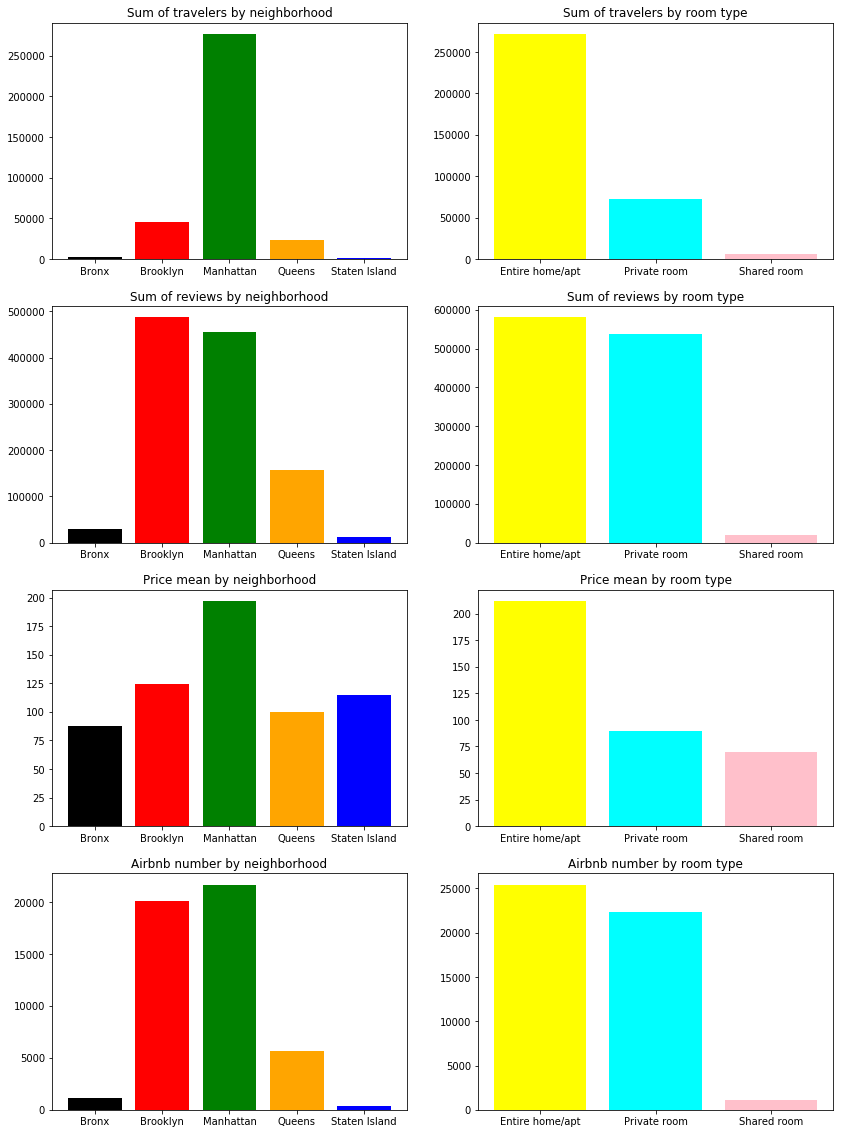

In [34]:
fig = plt.figure(figsize=(14,20))

# Sum of host by neighborhood
ax1 = plt.subplot(4,2,1)
ax1.bar(arange(5)+1,host_by_neighborhood['calculated_host_listings_count'],color=['black', 'red', 'green', 'orange', 'blue'])
ax1.set_title('Sum of travelers by neighborhood')
ax1.set_xticks(range(1,6))
ax1.set_xticklabels(['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],rotation=0)

# Sum of host by room type
ax2 = plt.subplot(4,2,2)
ax2.bar(arange(3)+1,host_by_type['calculated_host_listings_count'],color=['yellow', 'cyan', 'pink'])
ax2.set_title('Sum of travelers by room type')
ax2.set_xticks(range(1,4))
ax2.set_xticklabels(['Entire home/apt','Private room','Shared room'],rotation=0)

# Sum of reviews by neighborhood
ax3 = plt.subplot(4,2,3)
ax3.bar(arange(5)+1,host_by_neighborhood['number_of_reviews'],color=['black', 'red', 'green', 'orange', 'blue'])
ax3.set_title('Sum of reviews by neighborhood')
ax3.set_xticks(range(1,6))
ax3.set_xticklabels(['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],rotation=0)

# Sum of reviews by room type
ax4 = plt.subplot(4,2,4)
ax4.bar(arange(3)+1,host_by_type['number_of_reviews'],color=['yellow', 'cyan', 'pink'])
ax4.set_title('Sum of reviews by room type')
ax4.set_xticks(range(1,4))
ax4.set_xticklabels(['Entire home/apt','Private room','Shared room'],rotation=0)

# Price mean by neighborhood
ax5 = plt.subplot(4,2,5)
ax5.bar(arange(5)+1,host_by_neighborhood['price'],color=['black', 'red', 'green', 'orange', 'blue'])
ax5.set_title('Price mean by neighborhood')
ax5.set_xticks(range(1,6))
ax5.set_xticklabels(['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],rotation=0)

# Price mean by room type
ax6 = plt.subplot(4,2,6)
ax6.bar(arange(3)+1,host_by_type['price'],color=['yellow', 'cyan', 'pink'])
ax6.set_title('Price mean by room type')
ax6.set_xticks(range(1,4))
ax6.set_xticklabels(['Entire home/apt','Private room','Shared room'],rotation=0)

# Airbnb number by neighborhood
ax7 = plt.subplot(4,2,7)
ax7.bar(arange(5)+1,host_by_neighborhood['airbnb_number'],color=['black', 'red', 'green', 'orange', 'blue'])
ax7.set_title('Airbnb number by neighborhood')
ax7.set_xticks(range(1,6))
ax7.set_xticklabels(['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],rotation=0)

# Airbnb number by room type
ax8 = plt.subplot(4,2,8)
ax8.bar(arange(3)+1,host_by_type['airbnb_number'],color=['yellow', 'cyan', 'pink'])
ax8.set_title('Airbnb number by room type')
ax8.set_xticks(range(1,4))
ax8.set_xticklabels(['Entire home/apt','Private room','Shared room'],rotation=0)

plt.show()

In [35]:
# Divided by airbnb number
host_by_airbnb_by_neighborhood=host_by_neighborhood['calculated_host_listings_count']/host_by_neighborhood['airbnb_number']
review_by_airbnb_by_neighborhood=host_by_neighborhood['number_of_reviews']/host_by_neighborhood['airbnb_number']
host_by_airbnb_by_type=host_by_type['calculated_host_listings_count']/host_by_type['airbnb_number']
review_by_airbnb_by_type=host_by_type['number_of_reviews']/host_by_type['airbnb_number']

[Text(0, 0, 'Entire home/apt'),
 Text(0, 0, 'Private room'),
 Text(0, 0, 'Shared room')]

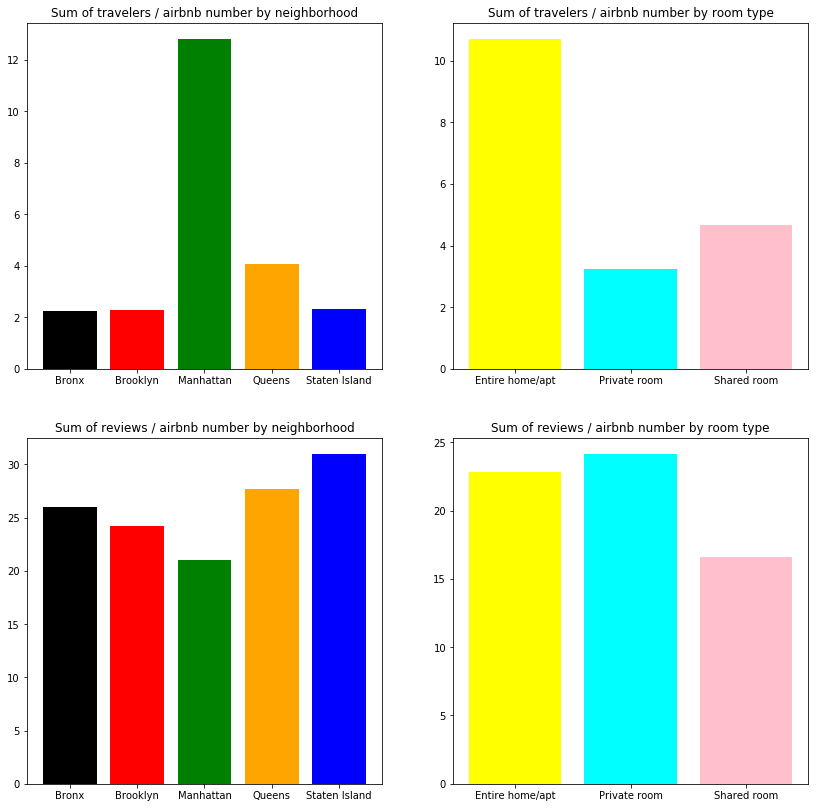

In [36]:
fig = plt.figure(figsize=(14,14))

# Sum of host by neighborhood
ax1 = plt.subplot(2,2,1)
ax1.bar(arange(5)+1,host_by_airbnb_by_neighborhood,color=['black', 'red', 'green', 'orange', 'blue'])
ax1.set_title('Sum of travelers / airbnb number by neighborhood')
ax1.set_xticks(range(1,6))
ax1.set_xticklabels(['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],rotation=0)

# Sum of host by room type
ax2 = plt.subplot(2,2,2)
ax2.bar(arange(3)+1,host_by_airbnb_by_type,color=['yellow', 'cyan', 'pink'])
ax2.set_title('Sum of travelers / airbnb number by room type')
ax2.set_xticks(range(1,4))
ax2.set_xticklabels(['Entire home/apt','Private room','Shared room'],rotation=0)

# Sum of reviews by neighborhood
ax3 = plt.subplot(2,2,3)
ax3.bar(arange(5)+1,review_by_airbnb_by_neighborhood,color=['black', 'red', 'green', 'orange', 'blue'])
ax3.set_title('Sum of reviews / airbnb number by neighborhood')
ax3.set_xticks(range(1,6))
ax3.set_xticklabels(['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],rotation=0)

# Sum of reviews by room type
ax4 = plt.subplot(2,2,4)
ax4.bar(arange(3)+1,review_by_airbnb_by_type,color=['yellow', 'cyan', 'pink'])
ax4.set_title('Sum of reviews / airbnb number by room type')
ax4.set_xticks(range(1,4))
ax4.set_xticklabels(['Entire home/apt','Private room','Shared room'],rotation=0)


In [37]:
# Number of type rooms by neighborhoods
type_neighborhood=Airbnb.groupby(['room_type','neighbourhood_group'])[['price']].count()
type_neighborhood.columns=['Airbnb_number']
type_neighborhood=type_neighborhood.unstack(level='neighbourhood_group')
type_neighborhood

Airbnb_number                                        
neighbourhood_group         Bronx Brooklyn Manhattan Queens Staten Island
room_type                                                                
Entire home/apt               379     9559     13199   2096           176
Private room                  652    10132      7982   3372           188
Shared room                    60      413       480    198             9

<Figure size 1440x1440 with 0 Axes>

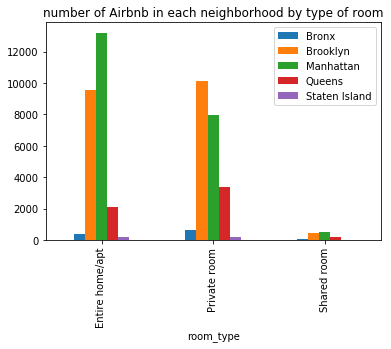

In [38]:
plt.figure(figsize=(20,20))
type_neighborhood.plot(kind='bar')
plt.title('number of Airbnb in each neighborhood by type of room')
plt.legend(['Bronx','Brooklyn','Manhattan','Queens','Staten Island'])
plt.show()

### Histogram

C:\Users\Diane\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


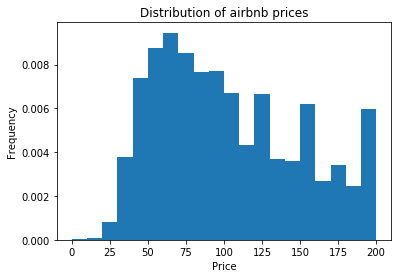

In [39]:
airbnb.plot(y='price', kind='hist', bins=20 , range=(0,200) , normed=True , legend=None)
plt.xlabel('Price')
plt.title('Distribution of airbnb prices')
plt.show()

C:\Users\Diane\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


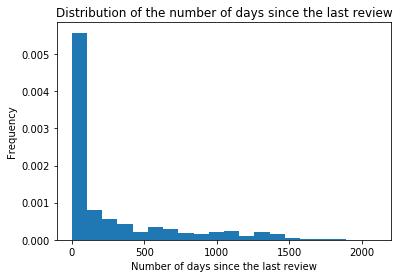

In [40]:
airbnb.plot(y='days_since_last_review', kind='hist', bins=20 , range=(0,2100) , normed=True , legend=None)
plt.xlabel('Number of days since the last review')
plt.title('Distribution of the number of days since the last review')
plt.show()

C:\Users\Diane\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


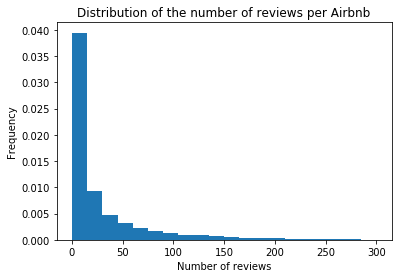

In [41]:
airbnb.plot(y='number_of_reviews', kind='hist', bins=20 , range=(0,300) , normed=True , legend=None)
plt.xlabel('Number of reviews')
plt.title('Distribution of the number of reviews per Airbnb')
plt.show()

C:\Users\Diane\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


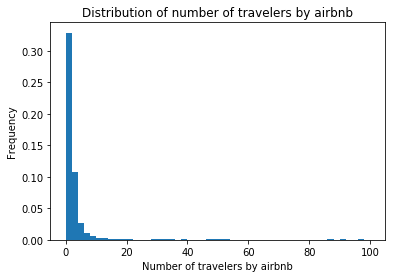

In [42]:
airbnb.plot(y='calculated_host_listings_count', kind='hist', bins=50 , range=(0,100) , normed=True , legend=None)
plt.xlabel('Number of travelers by airbnb')
plt.title('Distribution of number of travelers by airbnb')
plt.show()

### Statmodel

In [43]:
results = smf.ols('calculated_host_listings_count ~ price + minimum_nights + number_of_reviews + availability_365 + Entire_home + Private_room + Bronx + Brooklyn + Manhattan + Queens + days_since_last_review + latitude_from_Manhattan + longitude_from_Manhattan', data=airbnb).fit()
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     calculated_host_listings_count   R-squared:                       0.076
Model:                                        OLS   Adj. R-squared:                  0.076
Method:                             Least Squares   F-statistic:                     245.5
Date:                            Tue, 19 May 2020   Prob (F-statistic):               0.00
Time:                                    21:30:16   Log-Likelihood:            -1.8057e+05
No. Observations:                           38843   AIC:                         3.612e+05
Df Residuals:                               38829   BIC:                         3.613e+05
Df Model:                                      13                                         
Covariance Type:                        nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.97

### Correlation Matrix

In [44]:
data=airbnb.drop(['calculated_host_listings_count'],axis=1)
correlations = data.corr()
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,price,minimum_nights,number_of_reviews,availability_365,Entire_home,Private_room,Bronx,Brooklyn,Manhattan,Queens,days_since_last_review,latitude_from_Manhattan,longitude_from_Manhattan
price,1,0.026,-0.036,0.078,0.29,-0.27,-0.048,-0.091,0.17,-0.086,0.017,-0.031,0.16
minimum_nights,0.026,1,-0.069,0.1,0.073,-0.07,-0.017,-0.027,0.057,-0.035,0.053,-0.025,0.055
number_of_reviews,-0.036,-0.069,1,0.19,-0.016,0.022,0.0097,0.0051,-0.035,0.038,-0.28,0.0087,-0.055
availability_365,0.078,0.1,0.19,1,-0.028,0.011,0.066,-0.06,-0.037,0.1,-0.32,0.022,-0.1
Entire_home,0.29,0.073,-0.016,-0.028,1,-0.96,-0.052,-0.046,0.13,-0.1,0.007,0.023,0.18
Private_room,-0.27,-0.07,0.022,0.011,-0.96,1,0.044,0.054,-0.13,0.096,-0.001,-0.02,-0.17
Bronx,-0.048,-0.017,0.0097,0.066,-0.052,0.044,1,-0.13,-0.13,-0.055,-0.053,-0.33,-0.22
Brooklyn,-0.091,-0.027,0.0051,-0.06,-0.046,0.054,-0.13,1,-0.74,-0.31,0.017,0.68,-0.0023
Manhattan,0.17,0.057,-0.035,-0.037,0.13,-0.13,-0.13,-0.74,1,-0.32,0.061,-0.6,0.42
Queens,-0.086,-0.035,0.038,0.1,-0.1,0.096,-0.055,-0.31,-0.32,1,-0.084,-0.022,-0.63


# Machine Learning

In [45]:
# Import modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [46]:
# Separating dependant and independant variables
X=airbnb.drop(['calculated_host_listings_count'],axis=1)
y=airbnb['calculated_host_listings_count']

In [47]:
# Splitting into train set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)

In [48]:
# Finding the best hyperparameter 'max_depth'
param={'max_depth':np.arange(1,14)}
regr=RandomForestRegressor()
regr_cv=GridSearchCV(regr,param,cv=5)
regr_cv.fit(X_train,y_train)
print(regr_cv.best_params_)
print(regr_cv.best_score_)

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

{'max_depth': 11}
0.8407868783357795


In [51]:
# Random Forest Regressor
regr=RandomForestRegressor(max_depth=11,random_state=21)
regr.fit(X_train,y_train)
# Calculating r2 score 
y_pred=regr.predict(X_train)
print('R² Score train data = {}'.format(r2_score(y_train,y_pred)))
y_pred=regr.predict(X_test)
print('R² Score test data = {}'.format(r2_score(y_test,y_pred)))

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R² Score train data = 0.9549881956515872
R² Score test data = 0.8341625157571143


In [52]:
# Determining feature importances
feature_importances = pd.DataFrame(regr.feature_importances_,index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
longitude_from_Manhattan,0.327359
availability_365,0.222318
price,0.176915
latitude_from_Manhattan,0.115684
minimum_nights,0.087181
number_of_reviews,0.032604
days_since_last_review,0.029979
Manhattan,0.002835
Brooklyn,0.002027
Entire_home,0.001141
